In [1]:
import pm4py

In [2]:
import pandas as pd
import numpy as np
import pm4py
import os

path_loan = "C:/Users/harleenkaur/Documents/thesis/event logs/Artificial - Loan Process.xes"
log = pm4py.read_xes(path_loan)
print(f" Type of the file that is read : {type(log)}")
print(f" Length of the file that is read : {len(log)}")

parsing log, completed traces ::   0%|          | 0/100 [00:00<?, ?it/s]

 Type of the file that is read : <class 'pandas.core.frame.DataFrame'>
 Length of the file that is read : 590


In [4]:
log.head()

,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0


In [5]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'register application': 100}
End activities: {'send decision e-mail': 100}


In [6]:
dfg, start_activities, end_activities = pm4py.discover_dfg_typed(log) 
for item, key in dfg.items():
    print(item, key)


('accept', 'send decision e-mail') 20
('calculate capacity', 'accept') 13
('calculate capacity', 'check credit') 6
('calculate capacity', 'check system') 46
('calculate capacity', 'reject') 35
('check credit', 'accept') 1
('check credit', 'calculate capacity') 54
('check credit', 'check system') 38
('check credit', 'reject') 7
('check system', 'accept') 6
('check system', 'calculate capacity') 42
('check system', 'check credit') 4
('check system', 'reject') 38
('register application', 'calculate capacity') 4
('register application', 'check credit') 90
('register application', 'check system') 6
('reject', 'send decision e-mail') 80


## Visualising the DFG

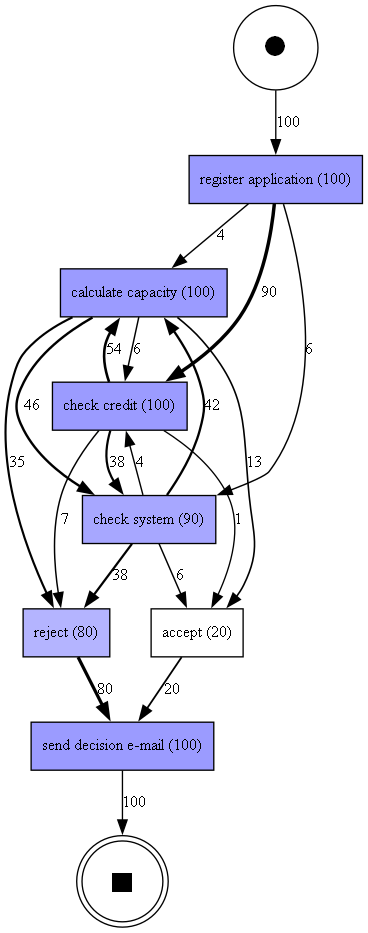

In [7]:
#pm4py.vis.view_dfg(dfg, start_activities, end_activities)  
pm4py.view_dfg(dfg,start_activities, end_activities)

### Visualising heuristic net

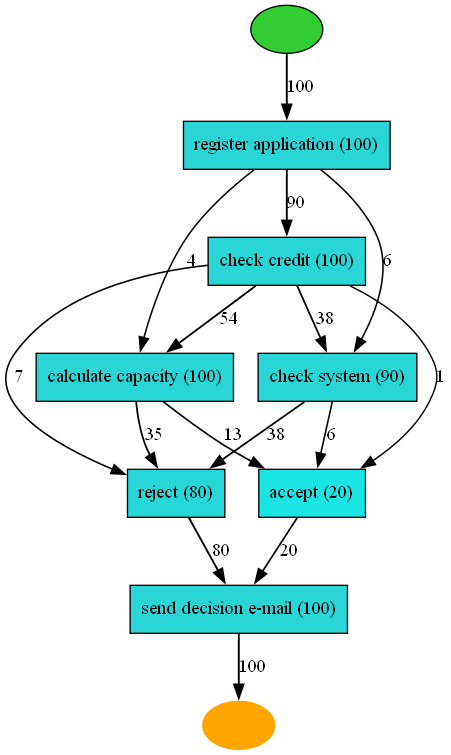

In [8]:
map = pm4py.discover_heuristics_net(log)
pm4py.view_heuristics_net(map)

### Visualise performance dfg

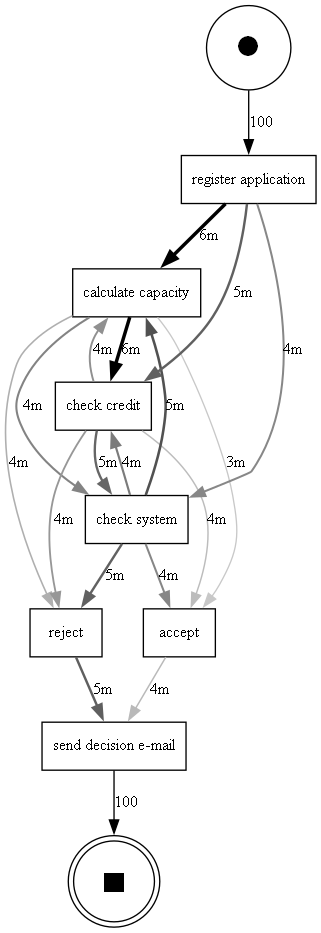

In [9]:
performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
pm4py.view_performance_dfg(performance_dfg, start_activities, end_activities)

## Calculate average time between start_event and end_event for trace 0

In [10]:
#log

In [11]:
trace0 = log[log['case:concept:name'] == 'trace 0']
trace0

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0,2013-04-16 10:08:01.821000+02:00
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0,2013-04-16 10:16:02.889000+02:00
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0,2013-04-16 10:16:27.858000+02:00
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0,2013-04-16 10:20:25.117000+02:00
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0,2013-04-16 10:21:29.939000+02:00
5,2013-04-16 10:26:53.166000+02:00,send decision e-mail,complete,trace 0,2013-04-16 10:26:53.166000+02:00


In [12]:
from datetime import datetime

In [13]:
dt = datetime.strptime('2013-04-16 10:10:01.759000+02:00', "%Y-%m-%d %H:%M:%S.%f%z")
date = dt.date()
time = dt.time()
time

datetime.time(10, 10, 1, 759000)

In [14]:
#get the start activity's name from start_activites dictionary 
start_activity =""
for key, value in start_activities.items():
    start_activity = key
#print(start_activity)

#get the date and time of the start activity 
preprocess = trace0[trace0['concept:name'] == start_activity]
start_dt_string = str(preprocess['time:timestamp'].iloc[0])
print(start_dt_string)

#convert the value from df to datetime 
start_dt =  datetime.strptime(start_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
start_dt_time = start_dt.time()
start_dt_time 


#get the date and time of end activity 
#get the start activity's name from start_activites dictionary 
end_activity =""
for key, value in end_activities.items():
    end_activity = key
#print(end_activity)

#get the date and time of the end activity 
preprocess = trace0[trace0['concept:name'] == end_activity]
end_dt_string = str(preprocess['time:timestamp'].iloc[0])
print(end_dt_string)

#convert the value from df to datetime 
end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
end_dt_time = end_dt.time()
end_dt_time

2013-04-16 10:08:01.821000+02:00
2013-04-16 10:26:53.166000+02:00


datetime.time(10, 26, 53, 166000)

In [15]:
#calculate delta time of a case
#from datetime import timedelta
timedelta = end_dt - start_dt
minutes = timedelta.seconds / 60
minutes

18.85

# Calculate average time between start_event and end_event for all cases

In [16]:
log.head()

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0,2013-04-16 10:08:01.821000+02:00
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0,2013-04-16 10:16:02.889000+02:00
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0,2013-04-16 10:16:27.858000+02:00
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0,2013-04-16 10:20:25.117000+02:00
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0,2013-04-16 10:21:29.939000+02:00


Get the total number of cases first. Then loop through each case and find the time delta of that case. Keep appending the time delta of the case to a list. At the end of the loop, calculate the average time duration taken by the activities from start to end. 

In [17]:
all_cases = np.unique(log['case:concept:name'])
total_number_of_cases = len(set(log['case:concept:name']))

For each case, create a subset DataFrame having only that particular concept name 

In [18]:
time_delta_list = []
for case in all_cases:
    current_trace =  log[log['case:concept:name'] == case]
#    print(current_trace)
    
    #calculate the time delta
    #get the start activity's name from start_activites dictionary 
    start_activity =""
    for key, value in start_activities.items():
        start_activity = key
    #print(start_activity)

    #get the date and time of the start activity 
    preprocess = current_trace[current_trace['concept:name'] == start_activity]
    start_dt_string = str(preprocess['time:timestamp'].iloc[0])
    #print(start_dt_string)

    #convert the value from df to datetime 
    start_dt =  datetime.strptime(start_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
    start_dt_time = start_dt.time()
    start_dt_time 


    #get the date and time of end activity 
    #get the start activity's name from start_activites dictionary 
    end_activity =""
    for key, value in end_activities.items():
        end_activity = key
    #print(end_activity)

    #get the date and time of the end activity 
    preprocess = current_trace[current_trace['concept:name'] == end_activity]
    end_dt_string = str(preprocess['time:timestamp'].iloc[0])
    #print(end_dt_string)

    #convert the value from df to datetime 
    try:
        end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
        end_dt_time = end_dt.time()
    except:
        #print(current_trace)
        #print('there is an error')
        end_dt =  datetime.strptime(end_dt_string, "%Y-%m-%d %H:%M:%S%z")
        end_dt_time = end_dt.time()
        #print(end_dt_time)
        
        
    #calculate delta time of a case
    #from datetime import timedelta
    timedelta = end_dt - start_dt
    minutes = timedelta.seconds / 60
    minutes
    
    #append the timedelta minutes to list
    time_delta_list.append(timedelta)

In [19]:
#time_delta_list

In [20]:
#sum all seconds and microseconds in time_delta_list
sum_time = 0
for element in time_delta_list:
    microsecond_to_second = element.microseconds / 1000000
    seconds_plus_microseconds = element.seconds + microsecond_to_second
    sum_time += seconds_plus_microseconds
    #print(seconds_plus_microseconds)

#take the average
print(sum_time)
average_start_end = sum_time / total_number_of_cases 
average_start_end_minutes = average_start_end / 60 
average_start_end_minutes

145443.65900000004


24.24060983333334

# Calculating duration window ('Task Duration') for each activity 

The time between start and end events of a single task is called task duration
the time between start events of two subsequent tasks is called temporal distance).
For each activity, I will calculate the time range in which that activity usually occurs. 

In [21]:
all_activities = np.unique(log['concept:name'])
total_number_of_activities = len(set(log['concept:name']))

In [22]:
#get all the rows where the activity is check credit
a = log[log['concept:name'] == 'check credit']
a

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0,2013-04-16 10:16:02.889000+02:00
7,2013-04-16 10:16:06.994000+02:00,check credit,complete,trace 1,2013-04-16 10:16:06.994000+02:00
13,2013-04-16 10:22:41.437000+02:00,check credit,complete,trace 2,2013-04-16 10:22:41.437000+02:00
19,2013-04-16 10:23:07.051000+02:00,check credit,complete,trace 3,2013-04-16 10:23:07.051000+02:00
25,2013-04-16 10:32:07.886000+02:00,check credit,complete,trace 4,2013-04-16 10:32:07.886000+02:00
...,...,...,...,...,...
564,2013-04-16 18:17:33.528000+02:00,check credit,complete,trace 95,2013-04-16 18:17:33.528000+02:00
570,2013-04-16 18:33:54.811000+02:00,check credit,complete,trace 96,2013-04-16 18:33:54.811000+02:00
576,2013-04-16 18:33:38.914000+02:00,check credit,complete,trace 97,2013-04-16 18:33:38.914000+02:00
582,2013-04-16 18:37:09.259000+02:00,check credit,complete,trace 98,2013-04-16 18:37:09.259000+02:00


In [23]:
for timestamp in a['time:timestamp']:
    pass
    #dt = datetime.strptime(str(timestamp), "%Y-%m-%d %H:%M:%S.%f%z").time()
    #print(dt)


## Temporal Profile From Pm4Py

Stertz, Florian, Jürgen Mangler, and Stefanie Rinderle-Ma. "Temporal Conformance Checking at Runtime based on Time-infused Process Models." arXiv preprint arXiv:2008.07262 (2020).

A temporal profile measures for every couple of activities in the log the average time and the standard deviation between events having the provided activities. The time is measured between the completion of the first event and the start of the second event. Hence, it is assumed to work with an interval log where the events have two timestamps. The output of the temporal profile discovery is a dictionary where each couple of activities (expressed as a tuple) is associated to a couple of numbers, the first is the average and the second is the average standard deviation.

In [24]:
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery
temporal_profile = temporal_profile_discovery.apply(log)

In [25]:
temporal_profile

{('accept', 'send decision e-mail'): (243.7, 138.87142861010156),
 ('calculate capacity', 'accept'): (344.05, 236.71023258517215),
 ('calculate capacity', 'check credit'): (422.875, 190.7941579668668),
 ('calculate capacity', 'check system'): (285.1521739130435,
  149.71602265493672),
 ('calculate capacity', 'reject'): (457.225, 280.5077211870818),
 ('calculate capacity', 'send decision e-mail'): (733.43, 335.88295384980273),
 ('check credit', 'accept'): (780.25, 355.3327388000688),
 ('check credit', 'calculate capacity'): (420.5108695652174,
  274.68737453095304),
 ('check credit', 'check system'): (425.9878048780488, 229.28361292967475),
 ('check credit', 'reject'): (789.9625, 338.09872139863586),
 ('check credit', 'send decision e-mail'): (1086.87, 402.0485838022238),
 ('check system', 'accept'): (489.10526315789474, 285.0763825006364),
 ('check system', 'calculate capacity'): (342.90909090909093,
  206.69985184475266),
 ('check system', 'check credit'): (500.875, 370.06309790165704

In [26]:
log

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
0,2013-04-16 10:08:01.821000+02:00,register application,complete,trace 0,2013-04-16 10:08:01.821000+02:00
1,2013-04-16 10:16:02.889000+02:00,check credit,complete,trace 0,2013-04-16 10:16:02.889000+02:00
2,2013-04-16 10:16:27.858000+02:00,calculate capacity,complete,trace 0,2013-04-16 10:16:27.858000+02:00
3,2013-04-16 10:20:25.117000+02:00,check system,complete,trace 0,2013-04-16 10:20:25.117000+02:00
4,2013-04-16 10:21:29.939000+02:00,accept,complete,trace 0,2013-04-16 10:21:29.939000+02:00
...,...,...,...,...,...
585,2013-04-16 18:30:01.968000+02:00,register application,complete,trace 99,2013-04-16 18:30:01.968000+02:00
586,2013-04-16 18:39:07.206000+02:00,calculate capacity,complete,trace 99,2013-04-16 18:39:07.206000+02:00
587,2013-04-16 18:48:13.183000+02:00,check credit,complete,trace 99,2013-04-16 18:48:13.183000+02:00
588,2013-04-16 18:50:59.050000+02:00,reject,complete,trace 99,2013-04-16 18:50:59.050000+02:00


In [27]:
#log.to_csv("output.xlsx")  

In [28]:
start_activities

{'register application': 100}

## FAILED : Get absolute time of each activity from start event 

###### separates the log file based on each case name and gives a list of dataframes (dfList) based on traces 

In [29]:
#df1 = log[log['case:concept:name'] == 'trace 6']

traceList = []

#separates the log file based on each case name and gives a list of dataframes based on traces 
def separateLogFile():
    traces = np.unique(log['case:concept:name'])
    for trace in traces:
        df1 = log[log['case:concept:name'] == trace]
        #print(df1)
        traceList.append(df1)
        
separateLogFile()

In [44]:
traceList[8]

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
96,2013-04-16 11:17:31.257000+02:00,register application,complete,trace 16,2013-04-16 11:17:31.257000+02:00
97,2013-04-16 11:23:37.875000+02:00,check credit,complete,trace 16,2013-04-16 11:23:37.875000+02:00
98,2013-04-16 11:28:35.492000+02:00,calculate capacity,complete,trace 16,2013-04-16 11:28:35.492000+02:00
99,2013-04-16 11:32:01.508000+02:00,check system,complete,trace 16,2013-04-16 11:32:01.508000+02:00
100,2013-04-16 11:37:03.621000+02:00,reject,complete,trace 16,2013-04-16 11:37:03.621000+02:00
101,2013-04-16 11:46:12.917000+02:00,send decision e-mail,complete,trace 16,2013-04-16 11:46:12.917000+02:00


In [31]:

    #convert the value from df to datetime 
    start_dt =  datetime.strptime(start_dt_string, "%Y-%m-%d %H:%M:%S.%f%z")
    start_dt_time = start_dt.time()
    start_dt_time 

datetime.time(18, 30, 1, 968000)

In [32]:
for currentDF in traceList:
    start_activity =""
    for key, value in start_activities.items():
        start_activity = key
    
    start_activity_row =  currentDF[currentDF['concept:name'] == start_activity]
    start_activity_timestamp = start_activity_row['time:timestamp']

    startActivitesTimestamp = []
    
    #appending to log
    for index, row in currentDF.iterrows():
        #print(row['start_timestamp'], row['concept:name'])
        startActivitesTimestamp.append(start_activity_timestamp) 
        
    currentDF['initial_timestamp'] = startActivitesTimestamp
    break

C:\Users\harleenkaur\AppData\Local\Temp\ipykernel_19776\3671067248.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currentDF['initial_timestamp'] = startActivitesTimestamp


In [33]:
#traceList.drop('startActivity TimeStamp')

# Version 2

## Get absolute time of activities for ONE TRACE
#### Note: still have to program for all traces

#### Idea: 
1. split log file according to different traces. Call it df. 
2. get the start_timestamp of the start_activity 
3. Iterate through the dataframe

    3.1 calculate the currentActivity's absolute time duration from step 2.
 
 3.2 add the absolute duration as a new column in df

In [34]:
df = log[log['case:concept:name'] == 'trace 8']

In [35]:
df

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp
48,2013-04-16 10:47:23.199000+02:00,register application,complete,trace 8,2013-04-16 10:47:23.199000+02:00
49,2013-04-16 10:51:25.512000+02:00,check credit,complete,trace 8,2013-04-16 10:51:25.512000+02:00
50,2013-04-16 10:52:53.923000+02:00,calculate capacity,complete,trace 8,2013-04-16 10:52:53.923000+02:00
51,2013-04-16 10:56:31.633000+02:00,check system,complete,trace 8,2013-04-16 10:56:31.633000+02:00
52,2013-04-16 11:01:17.541000+02:00,reject,complete,trace 8,2013-04-16 11:01:17.541000+02:00
53,2013-04-16 11:03:48.986000+02:00,send decision e-mail,complete,trace 8,2013-04-16 11:03:48.986000+02:00


In [36]:
#getting the start activity name
start_activity =""
for key, value in start_activities.items():
    start_activity = key

#get the timestamp of this activity 
startRow = df[df['concept:name'] == start_activity]
startTimeSeries = startRow['time:timestamp']

for i in startTimeSeries:
    startTime = i.to_pydatetime() 


In [37]:
for index, row in df.iterrows():
    currentTimestamp = row["time:timestamp"].to_pydatetime()
    currentConcept = row["concept:name"]
    absoluteTime = currentTimestamp - startTime
    print(absoluteTime)
    df.loc[index, 'AbsoluteTime'] = absoluteTime 


0:00:00
0:04:02.313000
0:05:30.724000
0:09:08.434000
0:13:54.342000
0:16:25.787000


C:\Users\harleenkaur\AppData\Local\Temp\ipykernel_19776\3767406400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'AbsoluteTime'] = absoluteTime


In [38]:
df

,time:timestamp,concept:name,lifecycle:transition,case:concept:name,start_timestamp,AbsoluteTime
48,2013-04-16 10:47:23.199000+02:00,register application,complete,trace 8,2013-04-16 10:47:23.199000+02:00,0 days 00:00:00
49,2013-04-16 10:51:25.512000+02:00,check credit,complete,trace 8,2013-04-16 10:51:25.512000+02:00,0 days 00:04:02.313000
50,2013-04-16 10:52:53.923000+02:00,calculate capacity,complete,trace 8,2013-04-16 10:52:53.923000+02:00,0 days 00:05:30.724000
51,2013-04-16 10:56:31.633000+02:00,check system,complete,trace 8,2013-04-16 10:56:31.633000+02:00,0 days 00:09:08.434000
52,2013-04-16 11:01:17.541000+02:00,reject,complete,trace 8,2013-04-16 11:01:17.541000+02:00,0 days 00:13:54.342000
53,2013-04-16 11:03:48.986000+02:00,send decision e-mail,complete,trace 8,2013-04-16 11:03:48.986000+02:00,0 days 00:16:25.787000


## Get absolute time of activities for ALL TRACES

1. Get list of unique values of all case:concept:name 


In [ ]:
#get unique values of all case:concept:name
case_concept_name_unique_list = np.unique(log['case:concept:name'])

In [123]:
c = 0

In [122]:
for caseConceptName in case_concept_name_unique_list:
    df = log[log['case:concept:name'] == caseConceptName]
    
    #getting the start activity name
    start_activity =""
    for key, value in start_activities.items():
        start_activity = key

    #get the timestamp of this activity 
    startRow = df[df['concept:name'] == start_activity]
    startTimeSeries = startRow['time:timestamp']

    for i in startTimeSeries:
        startTime = i.to_pydatetime() 
    
    
    for index, row in df.iterrows():
        currentTimestamp = row["time:timestamp"].to_pydatetime()
        currentConcept = row["concept:name"]
        absoluteTime = currentTimestamp - startTime
        #print(absoluteTime)
        df.loc[index, 'AbsoluteTime'] = absoluteTime 
    
    #print(df)
    


In [80]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.DataFrame({'Name':list('aabeaf'),
                   'A':[4,5,4,5,5,4],
                   'B':[7,8,9,4,2,3],
                   'C':[1,3,5,7,1,0]}, columns = ['Name','A','B','C'])

In [16]:
df

,Name,A,B,C
0,a,4,7,1
1,a,5,8,3
2,b,4,9,5
3,e,5,4,7
4,a,5,2,1
5,f,4,3,0


In [21]:
grouped = df.groupby(['Name'])

In [25]:
grouped

In [8]:
dic  ={}
x = 2
if 'a' in dic.keys():
    dic['a'] = (dic['a'] + x ) / 2
else:
    dic['a'] = x 
    
x = 1
dic['a'] = (dic['a'] + x ) / 2


x = 5
dic['a'] = (dic['a'] + x ) / 2

x = 2
dic['a'] = (dic['a'] + x ) / 2



dic


{'a': 2.625}

In [27]:
dict = {}

x = 2 
if 'a' not in dict.keys():
    dict['a'] = []
    dict['a'].append(x)
else:
    dict['a'].append(x)

x = 4
if 'a' not in dict.keys():
    dict['a'] = []
    dict['a'].append(x)
else:
    dict['a'].append(x)
    
    
x = 6
if 'a' not in dict.keys():
    dict['a'] = []
    dict['a'].append(x)
else:
    dict['a'].append(x)
    
dict

{'a': [2, 4, 6]}

In [19]:
dict ={'h': 7, 'l':7}
dict

{'h': 7, 'l': 7}